In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import ipyplot
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
movies = pd.read_csv('../data/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'], encoding='ISO-8859-1')
ratings = pd.read_csv('../data/ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], encoding='ISO-8859-1')
users = pd.read_csv('../data/users.dat', sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], encoding='ISO-8859-1')

In [3]:
print("Ratings dataset shape:", ratings.shape)
print("Users dataset shape:", users.shape)
print("Movies dataset shape:", movies.shape)

print("Ratings dataset info:")
print(ratings.info())

print("Users dataset info:")
print(users.info())

print("Movies dataset info:")
print(movies.info())

Ratings dataset shape: (1000209, 4)
Users dataset shape: (6040, 5)
Movies dataset shape: (3883, 3)
Ratings dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None
Users dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
None
Movies dataset info:

In [4]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
genres = movies['genres'].str.get_dummies('|')
df = pd.concat([movies, genres],axis=1).merge(ratings,how='left',on='movie_id').drop(columns={'genres'})
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,movie_id,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,timestamp
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,5.0,2001-01-06 23:37:48
1,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,4.0,2000-12-31 04:30:08
2,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,4.0,2000-12-31 03:31:36
3,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,5.0,2000-12-31 01:25:52
4,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,5.0,2000-12-31 01:34:34


In [8]:
df['timestamp'].describe()

count                 1000209
unique                 458455
top       2000-11-29 20:06:42
freq                       30
first     2000-04-25 23:05:32
last      2003-02-28 17:49:50
Name: timestamp, dtype: object

In [9]:
df = df[(~df['rating'].isna()) & (~df['user_id'].isna()) & (~df['timestamp'].isna())]
df.isnull().sum()

movie_id       0
title          0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
user_id        0
rating         0
timestamp      0
dtype: int64

In [15]:
df['user_id'] = df['user_id'].astype(int).astype(str)
df['rating'] = df['rating'].astype(int).astype(str)
df['movie_id'] = df['movie_id'].astype(int).astype(str)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000385
Data columns (total 23 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   movie_id     1000209 non-null  object        
 1   title        1000209 non-null  object        
 2   Action       1000209 non-null  int64         
 3   Adventure    1000209 non-null  int64         
 4   Animation    1000209 non-null  int64         
 5   Children's   1000209 non-null  int64         
 6   Comedy       1000209 non-null  int64         
 7   Crime        1000209 non-null  int64         
 8   Documentary  1000209 non-null  int64         
 9   Drama        1000209 non-null  int64         
 10  Fantasy      1000209 non-null  int64         
 11  Film-Noir    1000209 non-null  int64         
 12  Horror       1000209 non-null  int64         
 13  Musical      1000209 non-null  int64         
 14  Mystery      1000209 non-null  int64         
 15  Romance      10

In [17]:
# Sorting movies by number of ratings
df.groupby(['movie_id','title']).agg({'rating':'count'}).reset_index().sort_values(by='rating', ascending=False)

,movie_id,title,rating
1916,2858,American Beauty (1999),3428
1640,260,Star Wars: Episode IV - A New Hope (1977),2991
191,1196,Star Wars: Episode V - The Empire Strikes Back...,2990
208,1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
3182,480,Jurassic Park (1993),2672
...,...,...,...
3566,865,Small Faces (1995),1
3354,641,"Little Indian, Big City (Un indien dans la vil...",1
3569,868,Death in Brunswick (1991),1
710,1714,Never Met Picasso (1996),1


In [18]:
# Sorting users by number of ratings
df.groupby(['user_id']).agg({'rating':'count'}).reset_index().sort_values(by='rating', ascending=False)

,user_id,rating
3522,4169,2314
757,1680,1850
3642,4277,1743
1047,1941,1595
203,1181,1521
...,...,...
3760,4383,20
3740,4365,20
2927,3633,20
3704,4332,20


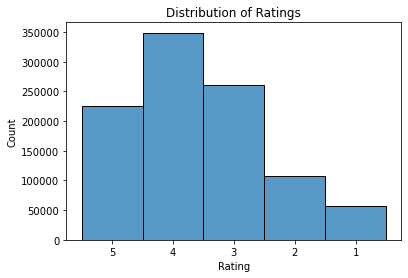

In [19]:
# Distribution of ratings
sns.histplot(df['rating'], bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

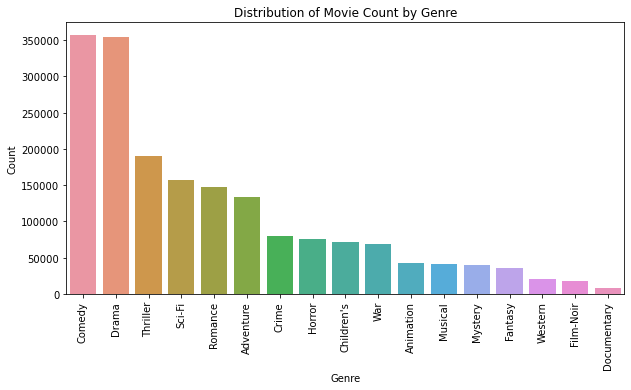

In [27]:
# Distribution of movie count by genre
genre_count = df.iloc[:, 3:-3].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_count.index, y=genre_count.values)
plt.title('Distribution of Movie Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [48]:
# Unpivot the genre columns
melted_df = df.melt(id_vars=['movie_id', 'rating', 'user_id'], var_name='genre', value_name='has_genre')
# Filter out rows where has_genre is 0
melted_df = melted_df[melted_df['has_genre'] == 1]
melted_df['rating'] = melted_df['rating'].astype(int)
# Table of average ratings by genre
average_ratings_genres = melted_df.groupby('genre')['rating'].mean().sort_values(ascending=False)
average_ratings_genres

genre
Film-Noir      4.075188
Documentary    3.933123
War            3.893327
Drama          3.766332
Crime          3.708679
Animation      3.684868
Mystery        3.668102
Musical        3.665519
Western        3.637770
Romance        3.607465
Thriller       3.570466
Comedy         3.522099
Action         3.491185
Adventure      3.477257
Sci-Fi         3.466521
Fantasy        3.447371
Children's     3.422035
Horror         3.215013
Name: rating, dtype: float64

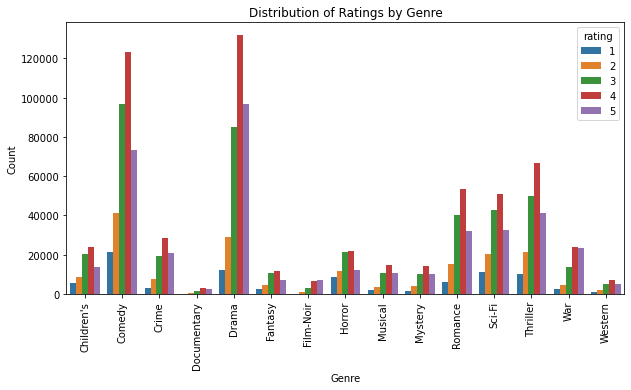

In [33]:
# Distribution of ratings by genre
genre_rating = df.groupby('rating').sum().iloc[:, 3:].reset_index()
genre_rating = genre_rating.melt(id_vars='rating', value_vars=genre_rating.columns[1:], var_name='genre', value_name='count')
plt.figure(figsize=(10, 5))
sns.barplot(x='genre', y='count', hue='rating', data=genre_rating)
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [49]:
users = users.drop(["zip_code"], axis = 1)

# Create age groups
bins = [0, 20, 30, 40, 50, 60, np.inf]
ages = ['<20', '20-29', '30-39','40-49', '51-60', '60+']
users['age_group'] = pd.cut(users['age'], bins, labels=ages)
users = users.drop(["age"], axis = 1)

occupation_map = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

# Map the occupation IDs to occupation names in the users dataframe
users['occupation'] = users['occupation'].map(occupation_map)

users.head()

,user_id,gender,occupation,age_group
0,1,F,K-12 student,<20
1,2,M,self-employed,51-60
2,3,M,scientist,20-29
3,4,M,executive/managerial,40-49
4,5,M,writer,20-29


In [51]:
# merge users with df
users['user_id'] = users['user_id'].astype(int).astype(str)
data = df.merge(users, how='left', on='user_id')
data.head()

,movie_id,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,timestamp,gender,occupation,age_group
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,2001-01-06 23:37:48,F,K-12 student,<20
1,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,4,2000-12-31 04:30:08,F,homemaker,40-49
2,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,2000-12-31 03:31:36,M,programmer,20-29
3,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,5,2000-12-31 01:25:52,M,technician/engineer,20-29
4,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10,5,2000-12-31 01:34:34,F,academic/educator,30-39


### Dataframes for bandit algorithms

In [ ]:
movie_features = df[['movie_id', 'Action', 'Adventure', 'Animation', "Children's",
                     'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                     'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

movie_features.head()

In [ ]:
# Generate user features as a sparse matrix
columnsToEncode = ['age_group','gender','occupation']
myEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
myEncoder.fit(users[columnsToEncode])

user_features = pd.concat([users.drop(columnsToEncode, 1), 
                           pd.DataFrame(myEncoder.transform(users[columnsToEncode]), 
                                        columns = myEncoder.get_feature_names_out(columnsToEncode))], axis=1).reindex()

user_features.head()